In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob
import pandas as pd
import json

def plot_guess_vs_label(input_path, title, threshold):
    input_path_list = glob(os.path.normpath(input_path) + "/*")
    print("Evaluating {} files".format(len(input_path_list)))

    scores_list = np.zeros(10)
    labels_list = np.zeros(10)

    for result_file_path in input_path_list:
        df = pd.read_csv(result_file_path, sep='\t', engine='python')
        gold_label = df["label"].astype(int)
        guesses = df["score"].astype(float)
        label_locs = [idx for idx, label in enumerate(gold_label) if label == 1]
        guess_locs = [idx for idx, guess in enumerate(guesses) if guess >= threshold]
        scores_list += np.histogram(guess_locs, bins=10)[0]
        labels_list += np.histogram(label_locs, bins=10)[0]

    print(scores_list)
    print(labels_list)
    X = np.arange(0, 100, step=10)
    plt.bar(X, scores_list, 2)
    plt.bar(X + 2, labels_list, 2)
    plt.title(title)
    plt.legend(labels=["Guesses", "Labels"])
    # plt.bar(labels_list)

def plot_test_sets(graph_title):
    nyt_path_list = glob(os.path.normpath("processed_data/presumm/nyt/test/") + "/*")
    booksum_path_list = glob(os.path.normpath("processed_data/presumm/booksum/test/") + "/*")
    propp_learner_path_list = glob(os.path.normpath("processed_data/presumm/propp_learner/test/") + "/*")
    turning_point_path_list = glob(os.path.normpath("processed_data/presumm/turning_point/test/") + "/*")
    print("Evaluating {} NYT files".format(len(nyt_path_list)))
    print("And evaluating {} BookSum files".format(len(booksum_path_list)))
    print("And evaluating {} ProppLearner files".format(len(propp_learner_path_list)))
    print("And evaluating {} Turning Point files".format(len(turning_point_path_list)))

    nyt_labels_list = np.zeros(4)
    booksum_labels_list = np.zeros(4)
    propp_learner_labels_list = np.zeros(4)
    turning_point_labels_list = np.zeros(4)

    for result_file_path in nyt_path_list:
        j = json.load(open(result_file_path))
        gold_label = j["tgt"]
        label_locs = [idx for idx, label in enumerate(gold_label) if label == 1]
        nyt_labels_list += np.histogram(label_locs, bins=4)[0]

    for result_file_path in booksum_path_list:
        j = json.load(open(result_file_path))
        gold_label = j["tgt"]
        label_locs = [idx for idx, label in enumerate(gold_label) if label == 1]
        booksum_labels_list += np.histogram(label_locs, bins=4)[0]
    
    for result_file_path in propp_learner_path_list:
        j = json.load(open(result_file_path))
        gold_label = j["tgt"]
        label_locs = [idx for idx, label in enumerate(gold_label) if label == 1]
        propp_learner_labels_list += np.histogram(label_locs, bins=4)[0]

    for result_file_path in turning_point_path_list:
        j = json.load(open(result_file_path))
        gold_label = j["tgt"]
        label_locs = [idx for idx, label in enumerate(gold_label) if label == 1]
        turning_point_labels_list += np.histogram(label_locs, bins=4)[0]
    print(nyt_labels_list)
    print(booksum_labels_list)
    print(propp_learner_labels_list)
    print(turning_point_labels_list)
    nyt_labels_list = (nyt_labels_list / nyt_labels_list.sum(axis=0)) * 100
    booksum_labels_list = (booksum_labels_list / booksum_labels_list.sum(axis=0)) * 100
    propp_learner_labels_list = (propp_learner_labels_list / propp_learner_labels_list.sum(axis=0)) * 100
    turning_point_labels_list = (turning_point_labels_list / turning_point_labels_list.sum(axis=0)) * 100
    print(nyt_labels_list)
    print(booksum_labels_list)
    print(propp_learner_labels_list)
    print(turning_point_labels_list)
    x = ["1st Quarter","2nd Quarter","3rd Quarter","4th Quarter"]
    plt.plot(x, nyt_labels_list, linestyle="dashed", marker='o')
    plt.plot(x, booksum_labels_list, linestyle='dashed', marker='s')
    plt.plot(x, propp_learner_labels_list, linestyle='dashed', marker='v')
    plt.plot(x, turning_point_labels_list, linestyle='dashed', marker='x')
    plt.ylabel("Occurrence (%)")
    plt.title(graph_title)
    plt.legend(labels=["NYT", "BookSum (Paragraph)", "Propp Learner", "Turning Point"], loc=0)
    plt.savefig("datasetdists.pdf")

Evaluating 4321 NYT files
And evaluating 13851 BookSum files
And evaluating 9 ProppLearner files
And evaluating 9 Turning Point files
[6957. 2019. 1875. 5400.]
[7892. 1162. 6842. 8124.]
[31. 27. 26. 42.]
[15. 11.  4. 15.]
[42.80967325 12.42385084 11.53775152 33.22872439]
[32.85595337  4.8376353  28.48459617 33.82181515]
[24.6031746  21.42857143 20.63492063 33.33333333]
[33.33333333 24.44444444  8.88888889 33.33333333]


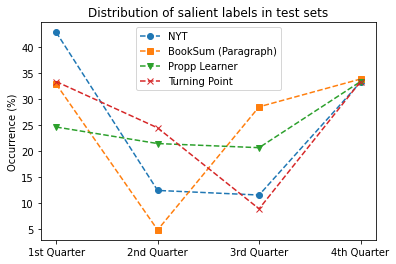

In [2]:
# plot_nyt_vs_booksum("processed_data/presumm/nyt/test/", "processed_data/presumm/booksum/test/", "Working Title")
plot_test_sets("Distribution of salient labels in test sets")

Evaluating 9 files
[11.  2.  6.  2.  2.  0.  1.  0.  1.  9.]
[9. 0. 1. 2. 3. 2. 4. 1. 1. 9.]


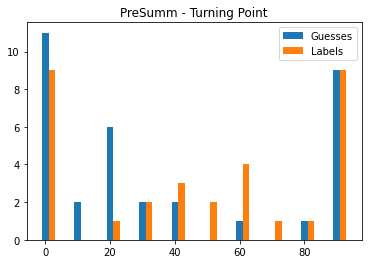

In [2]:
plot_guess_vs_label("../PreSumm/results/turning-point/.", "PreSumm - Turning Point", 0.125)

Evaluating 9 files
[7. 1. 0. 0. 1. 3. 3. 1. 0. 8.]
[13.  4.  4.  2.  0.  3.  3.  3.  4. 11.]


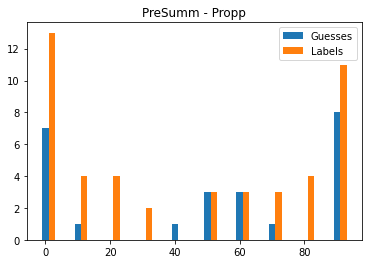

In [3]:

plot_guess_vs_label("../PreSumm/results/propp/.", "PreSumm - Propp", 0.125)

Evaluating 4321 files
[5162. 2332. 2515. 1657. 1243. 1630. 1268.  797.  890. 4441.]
[4594.  793.  882.  697.  432. 1034.  693.  460.  573. 4531.]


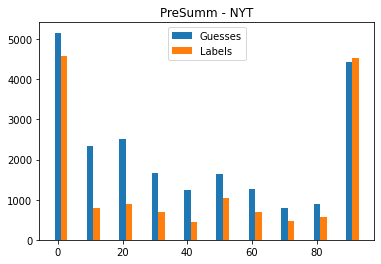

In [4]:
plot_guess_vs_label("../PreSumm/results/nyt/.", "PreSumm - NYT", 0.125)

Evaluating 9 files
[31. 22. 20. 24. 22. 20. 21. 25. 18. 47.]
[24.  5.  7. 12.  9. 10. 14.  9. 11. 29.]


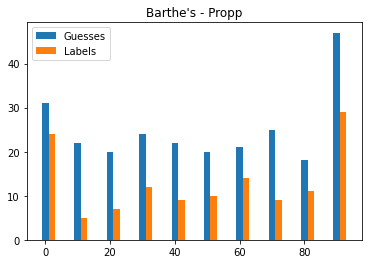

In [5]:
plot_guess_vs_label("../coling2020-modeling-event-salience/results/propp_learner/.", "Barthe's - Propp", 0.035)

Evaluating 9 files
[20.  7.  9.  9.  8.  5.  6. 10.  9. 17.]
[9. 4. 2. 6. 5. 0. 2. 6. 2. 9.]


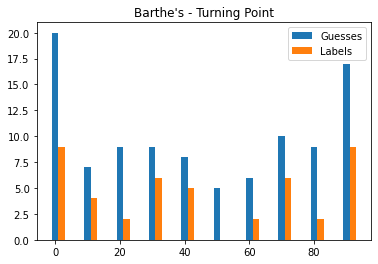

In [6]:
plot_guess_vs_label("../coling2020-modeling-event-salience/results/turning_point/.", "Barthe's - Turning Point", 0.035)

Evaluating 74 files
[165.  54.  56.  55.  37.  57.  49.  44.  79. 144.]
[78. 25. 34. 21. 29. 29. 13. 23. 34. 82.]


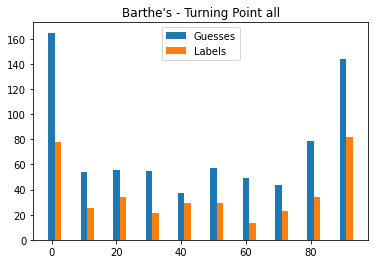

In [7]:
plot_guess_vs_label("../coling2020-modeling-event-salience/results/turning_point_all/.", "Barthe's - Turning Point all", 0.035)

Evaluating 4321 files
[10509.  5426.  5919.  5812.  5756.  6182.  6168.  6138.  6905. 12718.]
[5247. 1186. 1114.  846.  583. 1030.  692.  454.  543. 4556.]


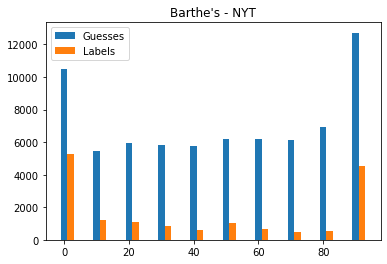

In [8]:
plot_guess_vs_label("../coling2020-modeling-event-salience/results/nyt/.", "Barthe's - NYT", 0.035)